In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df=pd.read_csv(r'C:\Amazon_Review_Sentimental_Analysis\data\review.csv')
df

,Product_name,rating,product_color,user_name,review_title,review_discription,review_dated
0,realme Buds Wireless 3 in-Ear Bluetooth Headph...,1.0 out of 5 stars,Blue,Jaysingh,Ekdm bakwas,Very very bad,22 August 2024
1,realme Buds Wireless 3 in-Ear Bluetooth Headph...,5.0 out of 5 stars,Vitality White,Firoz,Good noise cancellation,Good bass and noise cancellation,22 August 2024
2,realme Buds Wireless 3 in-Ear Bluetooth Headph...,5.0 out of 5 stars,Black,Dev Dadhich,Excellent 👌👌👌👌👌,Excellent product,22 August 2024
3,realme Buds Wireless 3 in-Ear Bluetooth Headph...,1.0 out of 5 stars,Pure Black,Amazon Customer,Product seal was broken when received......sel...,The media could not be loaded.\n ...,22 August 2024
4,realme Buds Wireless 3 in-Ear Bluetooth Headph...,4.0 out of 5 stars,Pure Black,RamizKhan,"Overall worth my money,1200 (offer applied)",Decent performance!Slightly uncomfortable!,22 August 2024
...,...,...,...,...,...,...,...
3307,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,1.0 out of 5 stars,Style Name: BY-M1 Black,Abhi,Low quality,Earphone has better mic than it.,16 July 2024
3308,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,5.0 out of 5 stars,Style Name: BY-M1 Black,The product is very nice,Good,Everything is good,16 July 2024
3309,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,5.0 out of 5 stars,Style Name: BY-M1 Black,Priyanka J.,Nice,Must but,16 July 2024
3310,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,3.0 out of 5 stars,Style Name: BY-M1 Pro,Raj Kanhowa,Good,The media could not be loaded.,15 July 2024


In [3]:
df.shape

(3312, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product_name        3190 non-null   object
 1   rating              3300 non-null   object
 2   product_color       3005 non-null   object
 3   user_name           3312 non-null   object
 4   review_title        3300 non-null   object
 5   review_discription  3267 non-null   object
 6   review_dated        3312 non-null   object
dtypes: object(7)
memory usage: 181.3+ KB


In [5]:
df.describe()

,Product_name,rating,product_color,user_name,review_title,review_discription,review_dated
count,3190,3300,3005,3312,3300,3267,3312
unique,54,5,335,2752,2104,2704,368
top,Amazon Brand - Symbol Men's Cotton Rich Polo T...,5.0 out of 5 stars,Size: 250 ml (Pack of 1),Amazon Customer,Good,Good,21 August 2024
freq,120,1549,114,157,225,129,132


In [6]:
# CHECKING FOR NULL VALUES :-
df.isnull().sum()

Product_name          122
rating                 12
product_color         307
user_name               0
review_title           12
review_discription     45
review_dated            0
dtype: int64

In [7]:
# CHECKED FOR DUPLICATE VALUES:-
df.duplicated().sum()

122

In [8]:
 # DROPPED DUPLICATE VALUES:-
df = df.drop_duplicates(keep=False)

In [9]:
# RE-CHECKING FOR ANY DUPLICATE VALUES:-
df.duplicated().sum()

0

In [10]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")


C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_17088\3157644658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


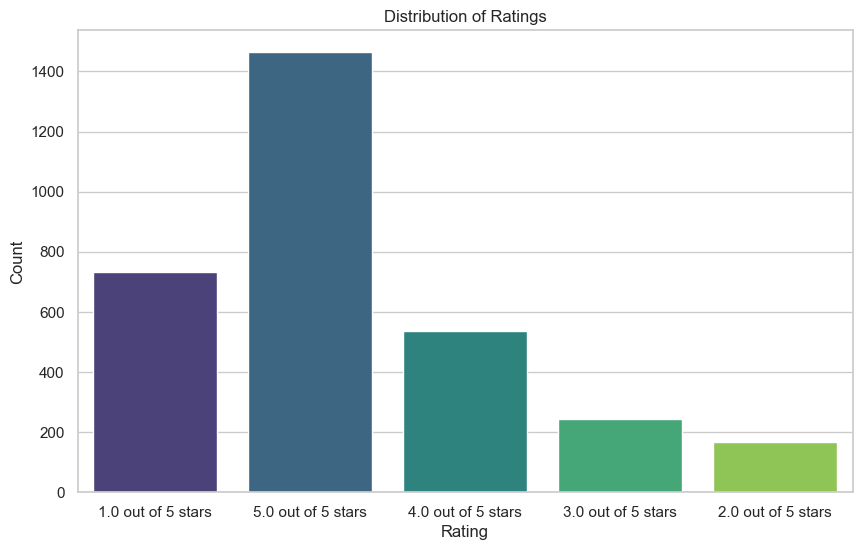

In [11]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_17088\2569352090.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')


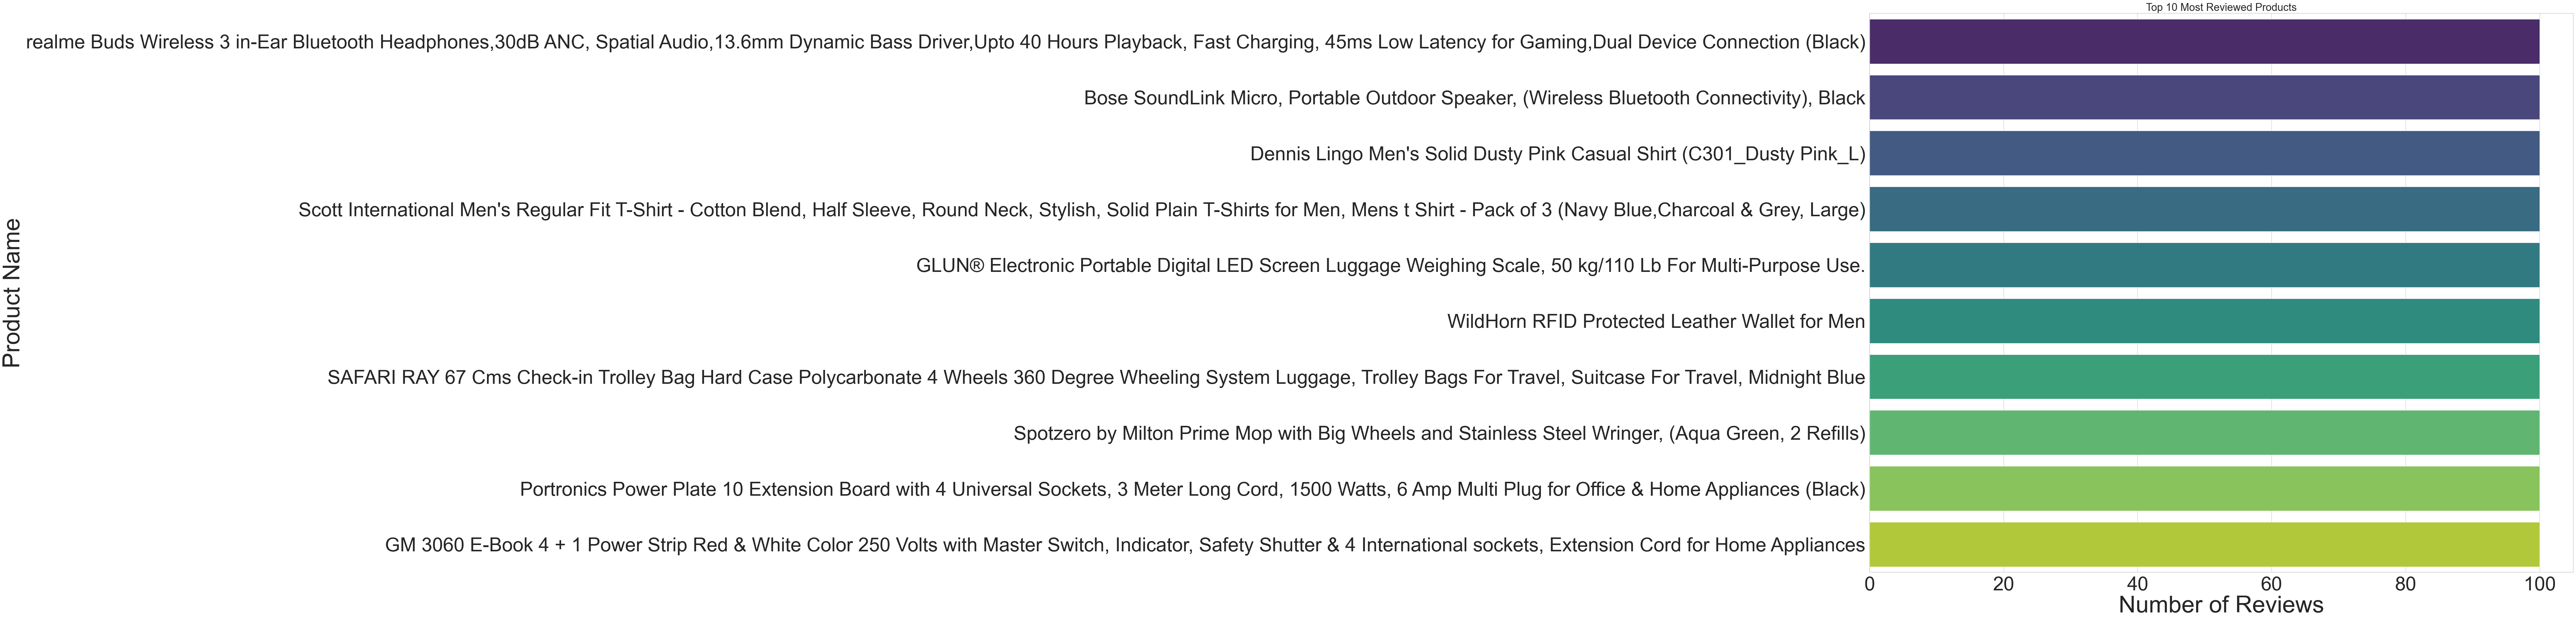

In [12]:
# Most Reviewed Products with enhanced visibility
plt.figure(figsize=(30, 24))  # Increase figure size
top_products = df['Product_name'].value_counts().head(10)
sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')

# Adjust title and labels for better visibility
plt.title('Top 10 Most Reviewed Products', fontsize=25)
plt.xlabel('Number of Reviews', fontsize=56)
plt.ylabel('Product Name', fontsize=56)

# Adjust tick parameters for better visibility
plt.xticks(fontsize=46)
plt.yticks(fontsize=46)

plt.show()

C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_17088\3119095780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_colors.index, x=top_colors.values, palette='viridis')


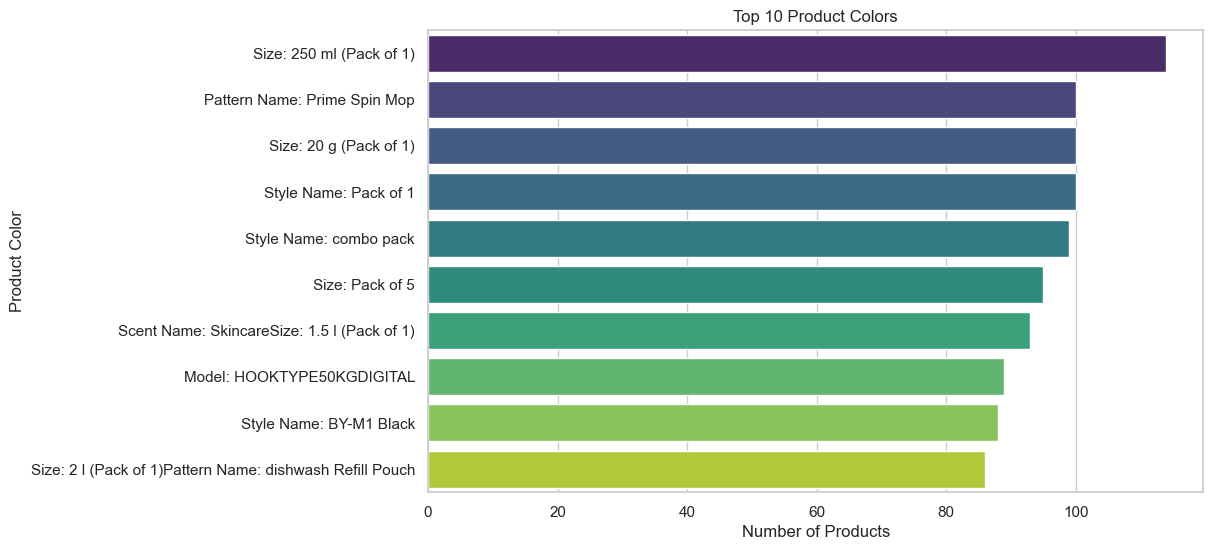

In [13]:
# Distribution of Product Colors
plt.figure(figsize=(10, 6))
top_colors = df['product_color'].value_counts().head(10)
sns.barplot(y=top_colors.index, x=top_colors.values, palette='viridis')
plt.title('Top 10 Product Colors')
plt.xlabel('Number of Products')
plt.ylabel('Product Color')
plt.show()

C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_17088\1094663947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_title'] = df['review_title'].astype(str).fillna('')


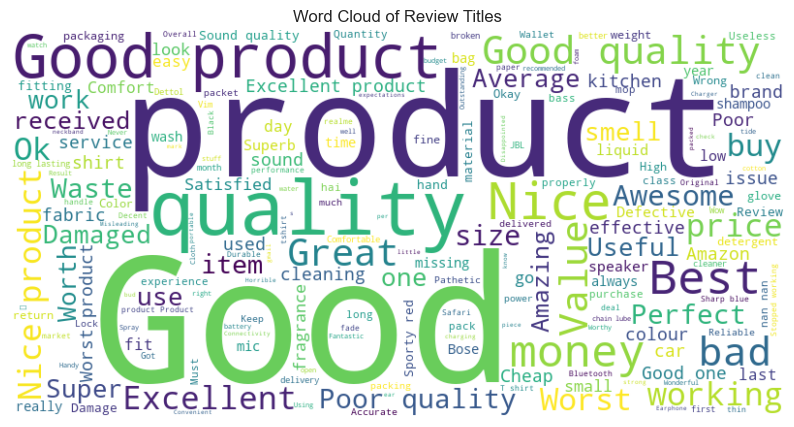

In [14]:
# Convert all values in 'review_title' to strings, replace NaNs with an empty string
df['review_title'] = df['review_title'].astype(str).fillna('')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['review_title']))

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Titles')
plt.show()

C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_17088\247580409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].str.extract(r'(\d+\.\d+)').astype(float)
C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_17088\247580409.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='product_color', data=df_top_colors, palette='coolwarm')


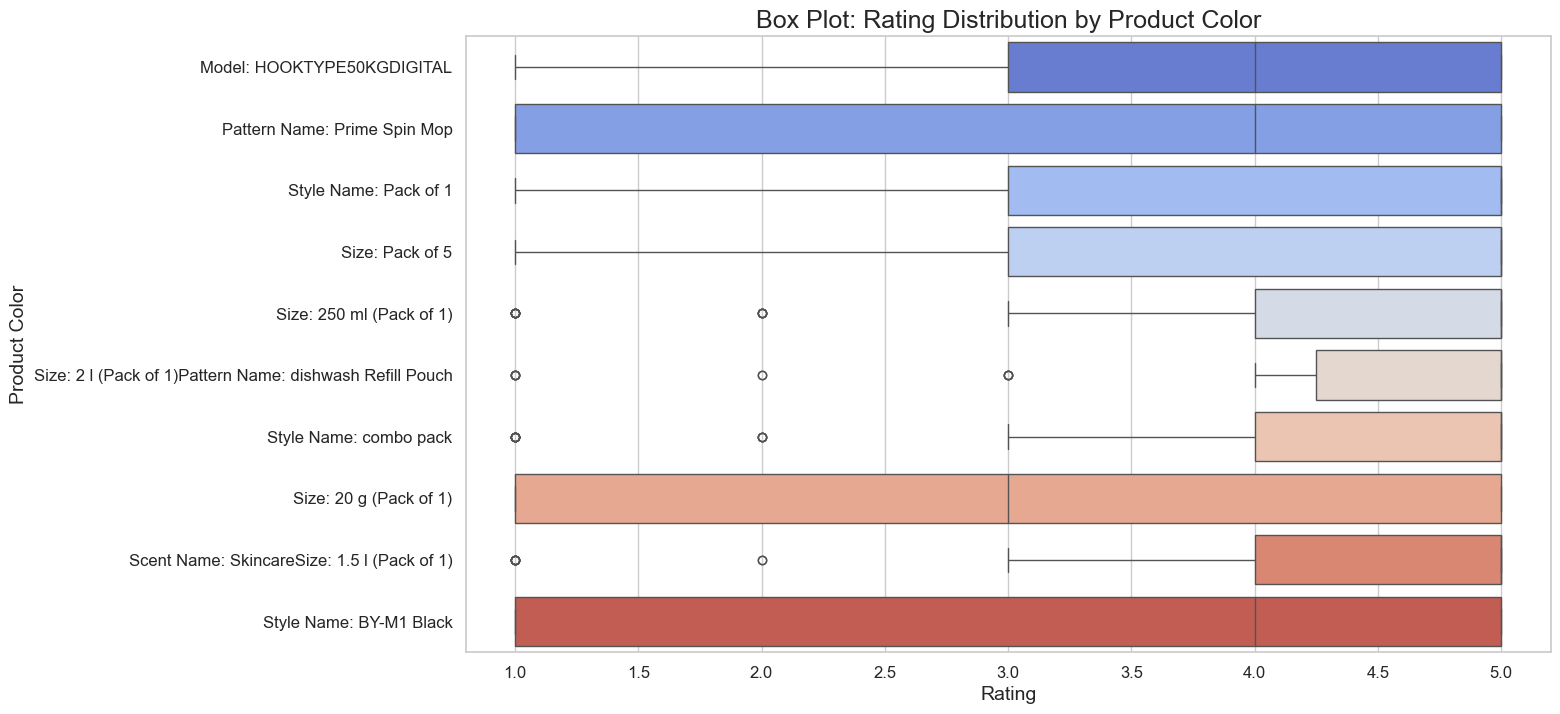

In [15]:
# Ensure that the rating column is numeric
df['rating'] = df['rating'].str.extract(r'(\d+\.\d+)').astype(float)

# Box Plot: Rating Distribution by Product Color (Top 10 Colors)
top_colors = df['product_color'].value_counts().head(10).index
df_top_colors = df[df['product_color'].isin(top_colors)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='rating', y='product_color', data=df_top_colors, palette='coolwarm')
plt.title('Box Plot: Rating Distribution by Product Color', fontsize=18)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Product Color', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


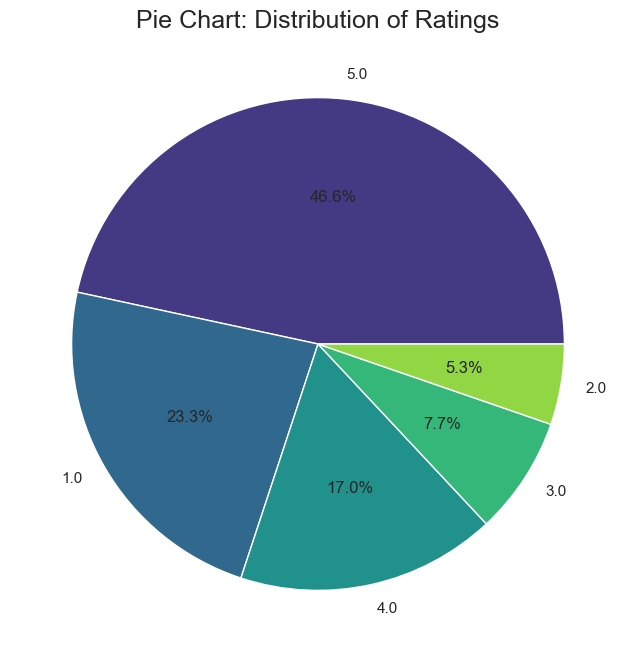

In [16]:
# Pie Chart: Distribution of Ratings
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(rating_counts)))
plt.title('Pie Chart: Distribution of Ratings', fontsize=18)
plt.show()


In [17]:
df

,Product_name,rating,product_color,user_name,review_title,review_discription,review_dated
0,realme Buds Wireless 3 in-Ear Bluetooth Headph...,1.0,Blue,Jaysingh,Ekdm bakwas,Very very bad,22 August 2024
1,realme Buds Wireless 3 in-Ear Bluetooth Headph...,5.0,Vitality White,Firoz,Good noise cancellation,Good bass and noise cancellation,22 August 2024
2,realme Buds Wireless 3 in-Ear Bluetooth Headph...,5.0,Black,Dev Dadhich,Excellent 👌👌👌👌👌,Excellent product,22 August 2024
3,realme Buds Wireless 3 in-Ear Bluetooth Headph...,1.0,Pure Black,Amazon Customer,Product seal was broken when received......sel...,The media could not be loaded.\n ...,22 August 2024
4,realme Buds Wireless 3 in-Ear Bluetooth Headph...,4.0,Pure Black,RamizKhan,"Overall worth my money,1200 (offer applied)",Decent performance!Slightly uncomfortable!,22 August 2024
...,...,...,...,...,...,...,...
3307,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,1.0,Style Name: BY-M1 Black,Abhi,Low quality,Earphone has better mic than it.,16 July 2024
3308,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,5.0,Style Name: BY-M1 Black,The product is very nice,Good,Everything is good,16 July 2024
3309,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,5.0,Style Name: BY-M1 Black,Priyanka J.,Nice,Must but,16 July 2024
3310,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,3.0,Style Name: BY-M1 Pro,Raj Kanhowa,Good,The media could not be loaded.,15 July 2024


In [18]:
df.drop(columns=['product_color', 'user_name', 'review_dated'], inplace=True)


C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_17088\3229432293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['product_color', 'user_name', 'review_dated'], inplace=True)


In [19]:
df.head(3)

,Product_name,rating,review_title,review_discription
0,realme Buds Wireless 3 in-Ear Bluetooth Headph...,1.0,Ekdm bakwas,Very very bad
1,realme Buds Wireless 3 in-Ear Bluetooth Headph...,5.0,Good noise cancellation,Good bass and noise cancellation
2,realme Buds Wireless 3 in-Ear Bluetooth Headph...,5.0,Excellent 👌👌👌👌👌,Excellent product


In [20]:
df.isnull().sum()

Product_name          32
rating                12
review_title           0
review_discription    43
dtype: int64

In [21]:
df.dropna(inplace=True)

C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_17088\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [22]:
df.shape

(3067, 4)

In [23]:
df.to_csv('modified_reviews.csv', index=False)